# Projekt IAU  
## 1. časť - Prieskumná analýza 
### Vypracovali: Marek Adamovič, Michal Pidanič
### Číslo datasetu: 32
### Podiel práce: 50/50

In [176]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

### Načítanie a výpis ukážky datasetu - labor.csv:

In [177]:
df_labor = pd.read_csv("data/labor.csv", sep='\t')
df_labor.head()

Unnamed: 0  indicator  erytrocyty smoker     weight  trombocyty       alp  \
0           0        1.0     6.91767    yes   69.94161     6.50529  81.48900   
1           1        0.0     9.70624     no  117.24842     6.83699  43.40520   
2           2        1.0     7.88145    yes   83.97086     7.75608  38.21236   
3           3        1.0     6.63073    yes  125.82753     6.06728  88.20804   
4           4        1.0     9.09638     no   50.70530     7.90158  90.12868   

     hbver    etytr relationship          ssn  leukocyty       ast  \
0  7.30162  6.77497    separated  041-29-7959    6.17532  60.01609   
1  7.90707  7.82625      married  183-58-0483    9.41015  56.79596   
2  6.81795  5.04172      widowed  411-84-5693    7.27551  63.29051   
3  7.63231  5.57008      divoced  028-84-2760    5.75381  26.62704   
4  8.75450  6.83533      married  375-37-7701    6.77832  32.74759   

   hematokrit     er-cv  hemoglobin             name      alt  
0     7.12529  44.43192     6.01513        Blake Fox  0.88575  
1     5.22638  48.17707     8.13065      Randy Solis  6.09530  
2     5.47408  29.81102     4.51670  Phillip Miranda  1.53154  
3     6.74435  52.06123     5.92597      Mark Watson  0.58661  
4     7.86582  51.68909     6.26871   Patrick Oliver  3.33738

### Načítanie a výpis ukážky datasetu - profiles.csv:

In [178]:
df_profiles = pd.read_csv("data/profiles.csv", sep='\t')
df_profiles.head()

Unnamed: 0   race                              job blood_group  \
0           0  Asian  Accountant, chartered certified          B-   
1           1  White            IT sales professional          B-   
2           2  Asian          Communications engineer         AB-   
3           3  White                             Make         AB-   
4           4  White              Surveyor, insurance          B+   

              birthdate sex            name                   company  \
0  06/17/1921, 00:00:00   F  Patricia Brown             Rodriguez Ltd   
1            1920/06/02   F   Gina Caldwell                Hunt-Morse   
2            1987-09-28   F  Melissa Sexton                 Solis PLC   
3           10 Nov 1992   F     Tina Parker              Spencer-Gray   
4            2021-07-11   M    Robert Roman  Thomas, Brown and Davies   

           ssn                                          residence  
0  662-96-0314                 PSC 9750, Box 8721\r\nAPO AA 13540  
1  867-83-9688  778 Malik Pass Apt. 777\r\nGonzalesshire, AK 3...  
2  151-28-6496    8847 Fleming Mountains\r\nSanchezside, WY 64944  
3  800-81-5887    801 Andrea Row Suite 260\r\nFloreston, CT 93023  
4  031-36-4415  550 Joseph Overpass Apt. 184\r\nNew Jamesport,...

## 1. Základný opis dát spolu s ich charakteristikami

### Počet záznamov:

In [179]:
print("\nPočet záznamov v labor.csv:", df_labor.shape[0])
print("\nPočet záznamov v profiles.csv:", df_profiles.shape[0])




Počet záznamov v labor.csv: 9922

Počet záznamov v profiles.csv: 3176


### Počet atribútov:

In [180]:
print("\nPočet atribútov v labor.csv:", df_labor.shape[1])
print("\nPočet atribútov v profiles.csv:", df_profiles.shape[1])


Počet atribútov v labor.csv: 18

Počet atribútov v profiles.csv: 10


### Typy atribútov - labor.csv:

In [181]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9922 entries, 0 to 9921
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9922 non-null   int64  
 1   indicator     9922 non-null   float64
 2   erytrocyty    9892 non-null   float64
 3   smoker        9922 non-null   object 
 4   weight        9922 non-null   float64
 5   trombocyty    9893 non-null   float64
 6   alp           9893 non-null   float64
 7   hbver         9893 non-null   float64
 8   etytr         9893 non-null   float64
 9   relationship  9922 non-null   object 
 10  ssn           9922 non-null   object 
 11  leukocyty     9893 non-null   float64
 12  ast           9893 non-null   float64
 13  hematokrit    9892 non-null   float64
 14  er-cv         9893 non-null   float64
 15  hemoglobin    9893 non-null   float64
 16  name          9922 non-null   object 
 17  alt           9893 non-null   float64
dtypes: float64(13), int64(1), ob

Zistili sme, že dataset labor.csv je zložený z atribútov typu:
- 1x int
- 13x float
- 4x object

### Typy atribútov - profiles.csv:

In [182]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   3176 non-null   int64 
 1   race         3176 non-null   object
 2   job          3176 non-null   object
 3   blood_group  3176 non-null   object
 4   birthdate    3176 non-null   object
 5   sex          3176 non-null   object
 6   name         3176 non-null   object
 7   company      3176 non-null   object
 8   ssn          3176 non-null   object
 9   residence    3176 non-null   object
dtypes: int64(1), object(9)
memory usage: 248.2+ KB


Zistili sme, že dataset profiles.csv je zložený z atribútov typu:
- 1x int
- 9x object

### Distribúcie

- v distribúciach významných atribútov sme hľadali atribúty, ktoré majú distribúciu podobnú normálnemu rozdeleniu
- pre testovanie tejto normality sme atribúty otestovali Shapiro testom

In [183]:
alpha = 0.05
test_value = df_labor["erytrocyty"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.9786995053291321, pvalue=6.404450377264099e-36)
Iná distribúcia


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Keďže p < 0.05 nejedná sa o normálnu distribúciu.

<AxesSubplot:xlabel='erytrocyty'>

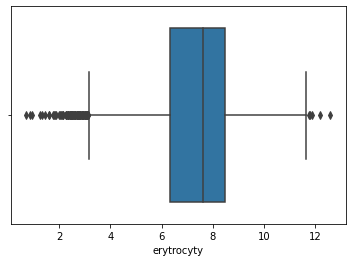

In [184]:
sns.boxplot(data=df_labor, x="erytrocyty")

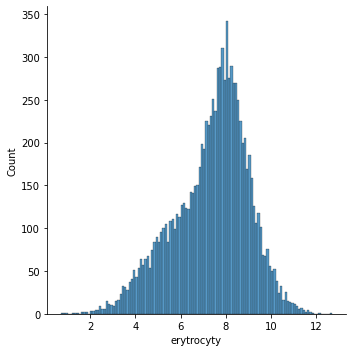

In [185]:
sns.displot(df_labor["erytrocyty"],  binwidth=0.1)

Na graforch vyššie môžeme vidieť distribúciu atribútu erytrocyty. Distribúcia je mierne pozitívne zošikmená a nejedná sa o normálnu distribúciu ako sme si už dokázali v Shapiro teste. Štandardná odchýlka je relatívne malá, čo znamená, väčšina hodnôt sa nachádza blízko priemernej hodnoty.

In [186]:
alpha = 0.05
test_value = df_labor["weight"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.9998617172241211, pvalue=0.8455379009246826)
Normálna distribúcia


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Keďže p > 0.05 jedná sa o normálnu distribúciu.

<AxesSubplot:xlabel='weight'>

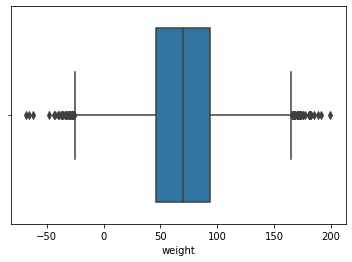

In [187]:
sns.boxplot(data=df_labor, x="weight")

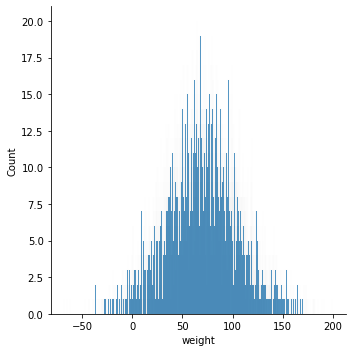

In [188]:
sns.displot(df_labor["weight"],  binwidth=0.1)

Pri atribúte weight sa podľa Shapiro testu aj podľa grafu jedná o normálnu distribúciu, avšak ako si môžeme všimnúť dáta v datasete obsahujú skreslené a nesprávne informácie = predpokladáme, že človek nemôže mať zápornú váhu.

In [189]:
alpha = 0.05
test_value = df_labor["hematokrit"].dropna().to_numpy()
test_result = shapiro(test_value)
print(test_result)
if test_result.pvalue > alpha:
    print("Normálna distribúcia")
else:
    print("Iná distribúcia")

ShapiroResult(statistic=0.999786913394928, pvalue=0.44710859656333923)
Normálna distribúcia


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Výsledok Shapiro testu pre atribút hematokrit ukázal, že distribúcia bude znovu normálna, pretože p > 0.05

<AxesSubplot:xlabel='hematokrit'>

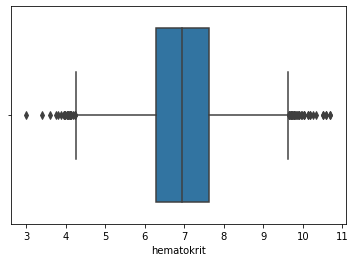

In [190]:
sns.boxplot(data=df_labor, x="hematokrit")

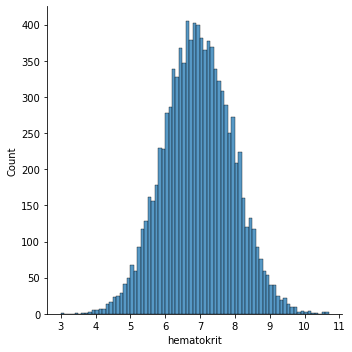

In [191]:
sns.displot(df_labor["hematokrit"],  binwidth=0.1)

Na grafoch pre zobrazenie distribúcie hodnôt atribútu hematokrit, môžeme pozorovať ukákážkovú normálnu distribúciu s relatívne malou štandardnou odchýlkou.

### Deskriptívne štatistiky - labor.csv:

In [192]:
df_labor.describe()

Unnamed: 0    indicator   erytrocyty       weight   trombocyty  \
count  9922.000000  9922.000000  9892.000000  9922.000000  9893.000000   
mean   4960.500000     0.643923     7.354813    70.033130     6.929616   
std    2864.379019     0.478863     1.655995    35.360537     1.010643   
min       0.000000     0.000000     0.695010   -68.224370     2.373590   
25%    2480.250000     0.000000     6.341305    46.241730     6.257310   
50%    4960.500000     1.000000     7.627100    70.063115     6.923910   
75%    7440.750000     1.000000     8.480747    93.885320     7.610340   
max    9921.000000     1.000000    12.598130   199.399280    10.907460   

               alp        hbver        etytr    leukocyty          ast  \
count  9893.000000  9893.000000  9893.000000  9893.000000  9893.000000   
mean     58.523833     6.924524     6.146493     6.929109    51.940039   
std      25.531979     1.443274     1.615464     1.006582    12.668313   
min       0.000000     1.413770     0.000000     2.813300     0.000000   
25%      37.089460     5.735280     5.024650     6.242530    43.238440   
50%      64.505430     6.764880     6.045330     6.929120    51.721660   
75%      81.404220     8.129740     7.193810     7.618590    60.578170   
max     100.000000    11.481020    11.721240    10.565480   100.000000   

        hematokrit        er-cv   hemoglobin          alt  
count  9892.000000  9893.000000  9893.000000  9893.000000  
mean      6.947397    51.777510     6.507270     2.050173  
std       0.990816    13.967717     1.565332     3.117817  
min       2.993240     0.000000     1.733080     0.000000  
25%       6.275028    42.627870     5.345560     0.742730  
50%       6.931925    51.805920     6.398260     1.220830  
75%       7.621490    61.182190     7.740200     2.138300  
max      10.691170   100.000000    11.792360   100.000000

Z deskriptívnych štatistík možno vyčítať:
- count = počet záznamov .. ľahko vidíme, koľko dát z daného stĺpca chýba
- mean = aritmetický priemer
- std = smerodajná odchýlka, hovorí o veľkosti rozptylu dát oproti aritmetickému priemeru

## 2. Párová analýza dát

Pomocou funkcie DataFrame.corr() sa môžeme pozrieť na jednotlivé korelácie atribútov v datasete

<AxesSubplot:>

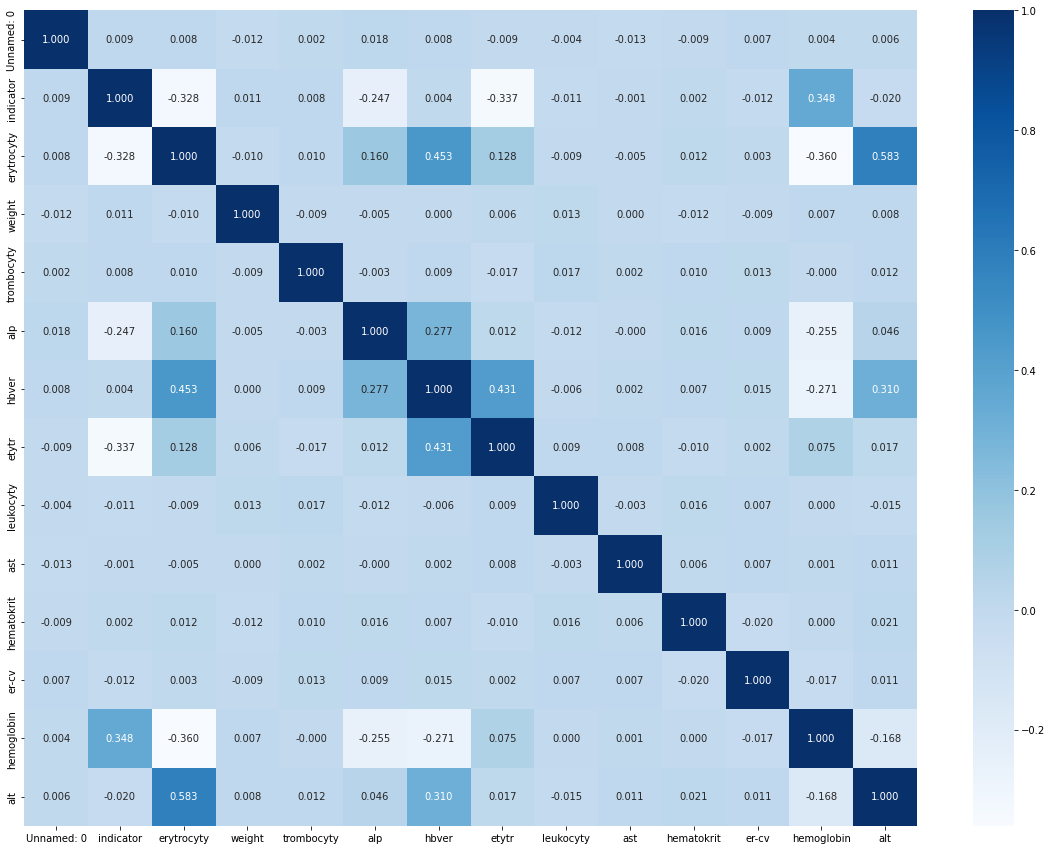

In [193]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_labor.corr(), ax = ax, annot = True, fmt = ".3f", cmap="Blues")

Pre lepšiu ukážku korelácii sme si ich vizualizovali pomocou heatmapy, čím ďalej je číslo od nuly (čím tmavšia farba v heatmape), tým silnejšia je korelácia = viac na sebe atribúty závisia.

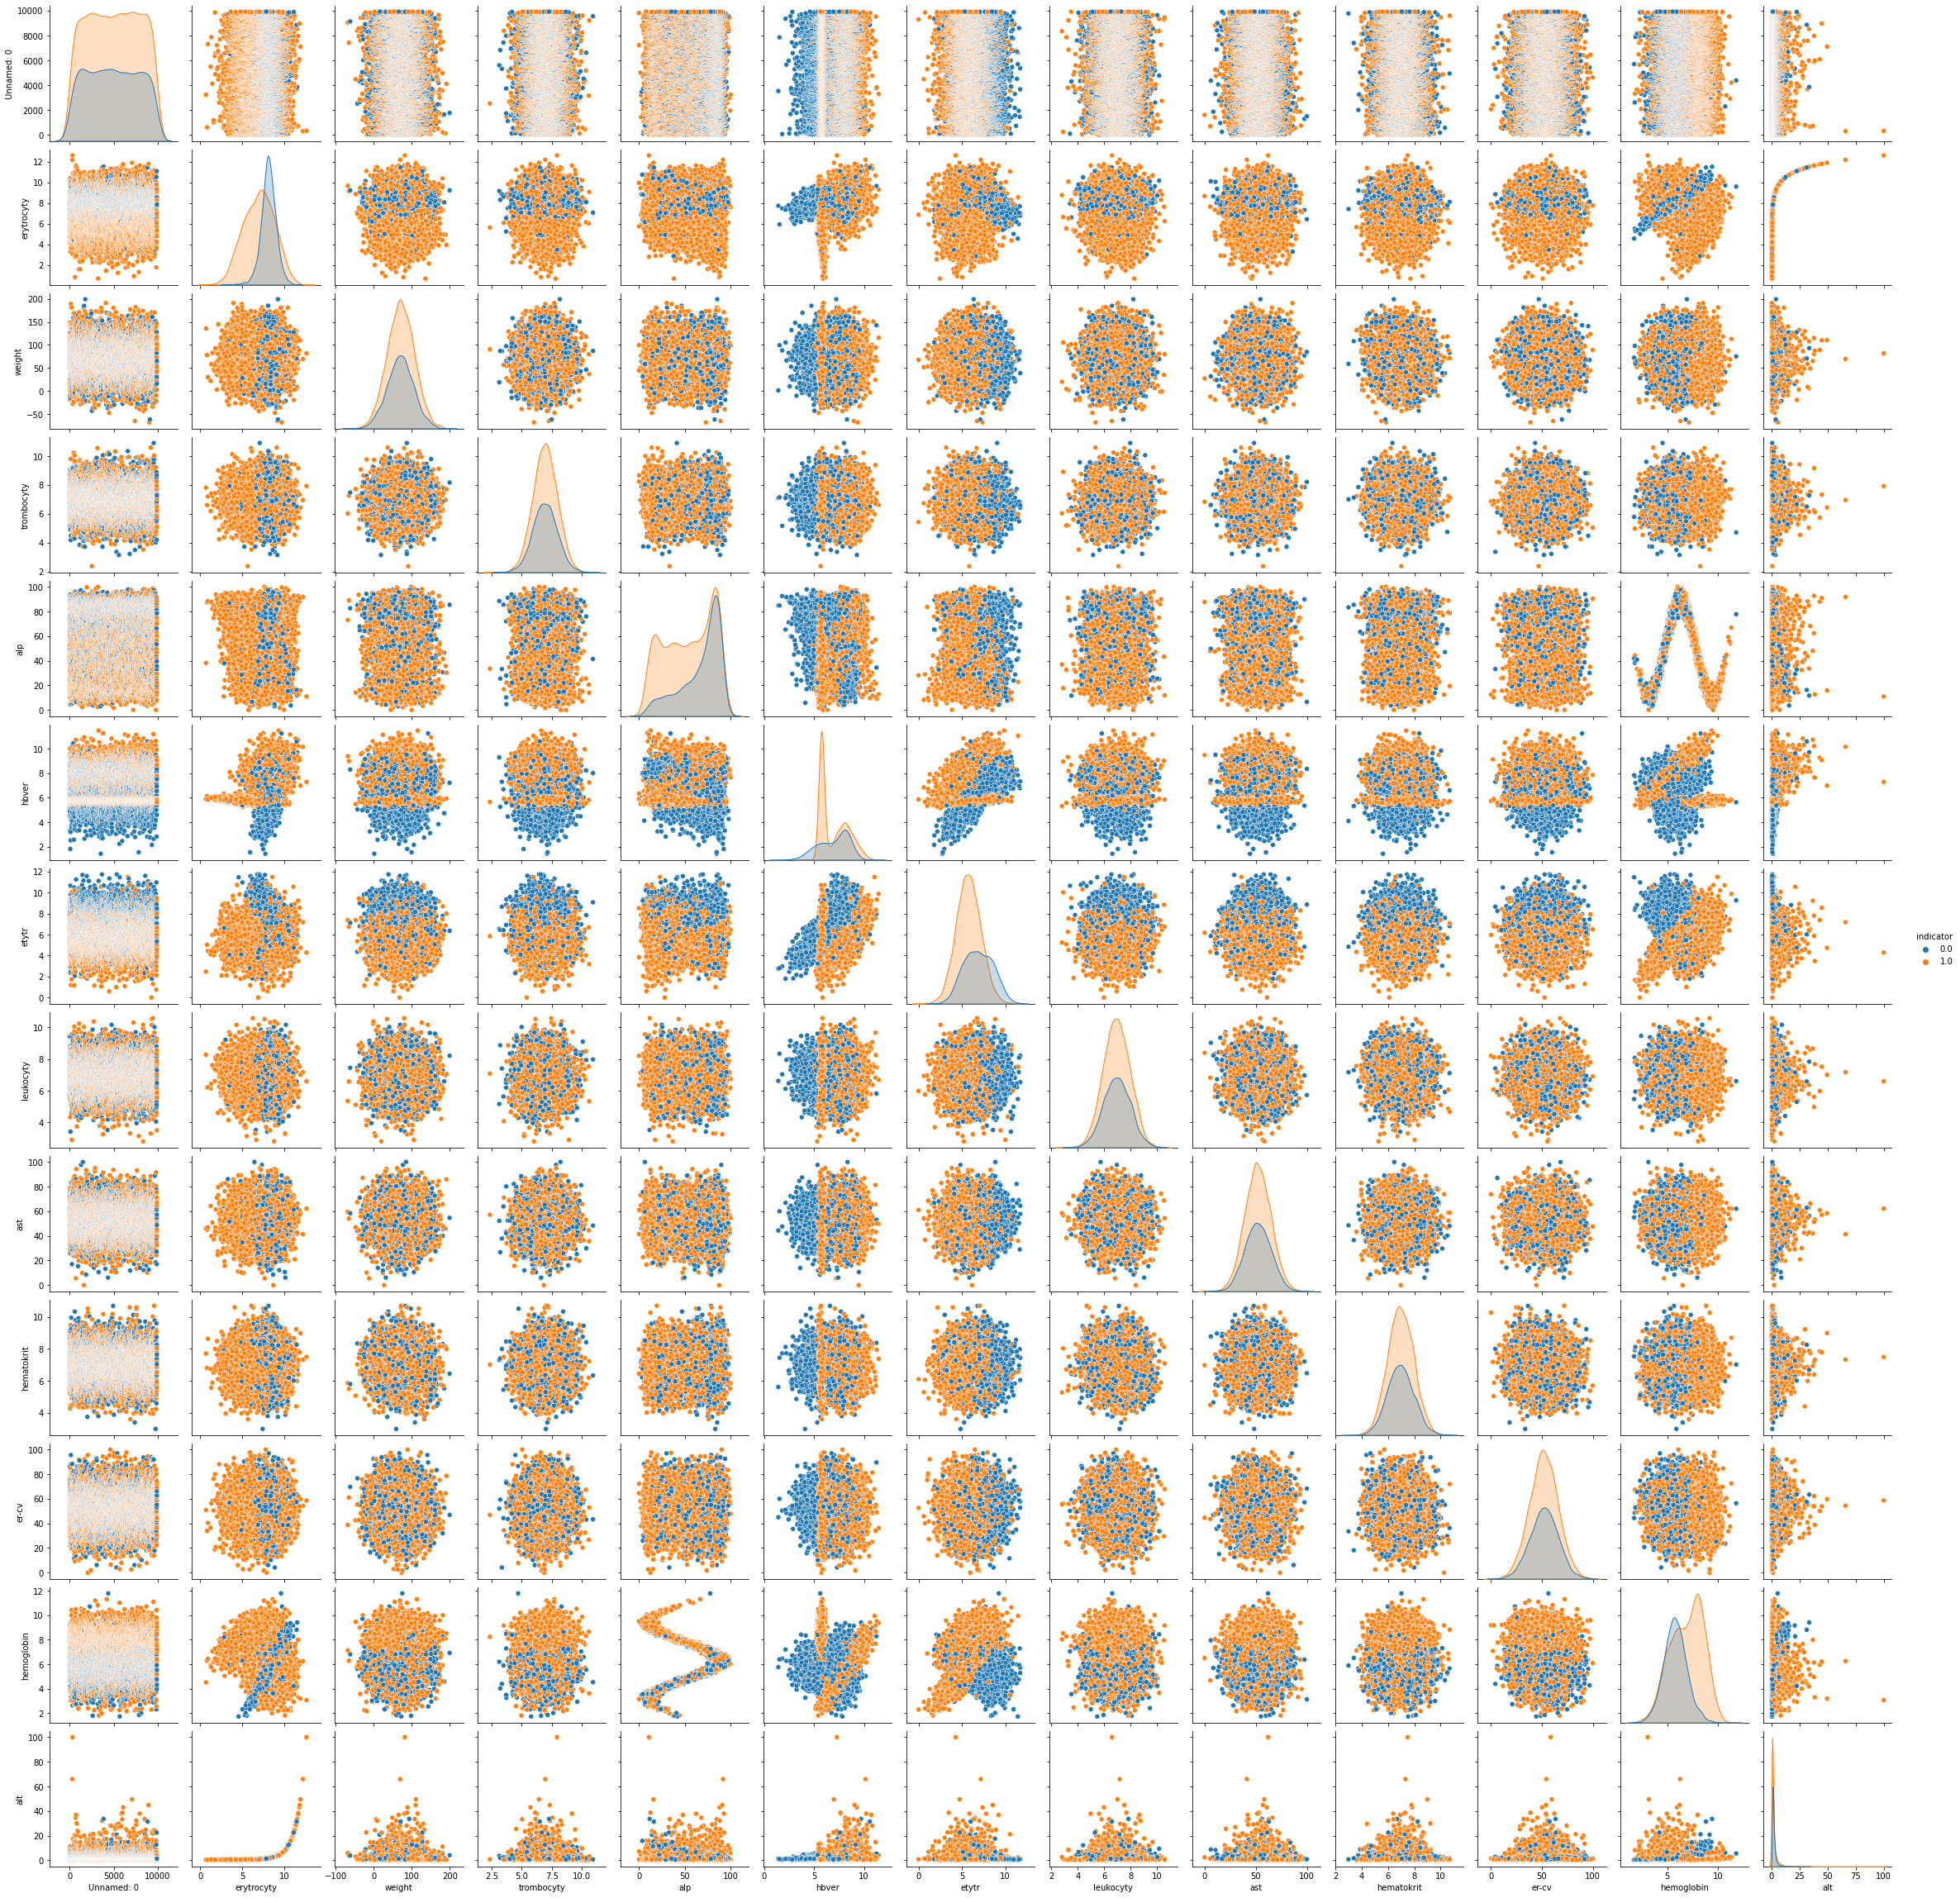

In [194]:
sns.pairplot(df_labor, hue = "indicator")

Pre ešte prehľadnejšie zobrazenie korelácií sme použili pairplot. Ako môžeme vidieť alt a erytrocyty spolu viditeľne korelujú

## 4. Identifikácia problémov v dátach s navrhnutým riešením

### Opravy
Premenovať prvý stĺpec Unnamed: 0 na id pacienta. Rýchlo skontrolujeme, či sú čísla v tomto stĺpci naozaj jedinečné.

In [195]:
df_labor = df_labor.rename(columns={"Unnamed: 0": "patient_id"})
print(df_labor.patient_id.duplicated().any())



False


Opravíme v tabuľke "divoced" na "divorced"


In [196]:
df_labor.relationship = df_labor.relationship.replace({"divoced": "divorced"})

Stĺpec smoker má rôzne hodnoty yes/no/Y/N .. upravíme ich na rovnaké: 1/0

In [197]:
print("Old values: ", pd.unique(df_labor.smoker))
df_labor.smoker = df_labor.smoker.replace({"Y": 1, "N": 0, "yes": 1, "no": 0})
print("New values: ", pd.unique(df_labor.smoker))

Old values:  ['yes' 'no' 'Y' 'N']
New values:  [1 0]


### Duplikáty

Pozrieme sa, či nemáme v dátach duplicitné záznamy .. skontrolujeme to nad všetkými stĺpcami okrem patient_id, keďže to je vždy jedinečné

In [198]:
print(df_labor.drop('patient_id', axis=1).duplicated().any())

True


V dátach máme duplikáty, takže sa ich zbavíme

In [199]:
print("Pocet zaznamov s duplikatmi: " + str(df_labor.shape[0]))
df_labor = df_labor.drop_duplicates(subset=df_labor.drop('patient_id', axis=1).columns)
print("Pocet zaznamov bez duplikatov: " + str(df_labor.shape[0]))

Pocet zaznamov s duplikatmi: 9922
Pocet zaznamov bez duplikatov: 9824


### Chýbajúce dáta
Najskôr skontrolujeme, v ktorých stĺpcoch chýba koľko dát

In [200]:
print(df_labor.isnull().sum())

patient_id       0
indicator        0
erytrocyty      29
smoker           0
weight           0
trombocyty      29
alp             29
hbver           29
etytr           29
relationship     0
ssn              0
leukocyty       29
ast             29
hematokrit      29
er-cv           29
hemoglobin      29
name             0
alt             29
dtype: int64


Každá metóda náhrady dát má svoje výhody a nevýhody. Často sa využíva aj zanedbanie záznamov s chýbajucími dátami. My sme zvolili štatistickú imputáciu pomocou priemeru, teda že za chýbajúce dáta sa dosadí priemerná hodnota vypočítaná z ostatných záznamov.

In [206]:
missing = ["erytrocyty", "trombocyty", "alp", "hbver", "etytr", "leukocyty", "ast", "hematokrit", "er-cv", "hemoglobin", "alt"]
means = df_labor[missing].mean()
df_labor[missing] = df_labor[missing].fillna(value=means)
print(df_labor.isnull().any())

patient_id      False
indicator       False
erytrocyty      False
smoker          False
weight          False
trombocyty      False
alp             False
hbver           False
etytr           False
relationship    False
ssn             False
leukocyty       False
ast             False
hematokrit      False
er-cv           False
hemoglobin      False
name            False
alt             False
dtype: bool


### Chybné dáta
V stĺpci s váhou máme negatívne hodnoty, čo je nemožné. Predtým, ako sa rozhodneme, čo s takýmito dátami spravíme, sa pozrieme, koľko ich je.

In [115]:
print(df_labor[df_labor.weight <= 0].shape[0])

235


Mohli by sme v daných záznamoch nahradiť váhu s priemernou váhou v ostatných záznamoch. Avšak to by nemuselo byť vhodné napríklad pre počítanie korelácie s váhou. Taktiež je tu možnosť, že ak bola chybne nameraná váha, tak aj ostatné dáta v meraní sú "nezmyselné". Z tohto dôvodu (a taktiež pri uvážení, že týchto chybných dát nie je tak veľa) zvolíme zanedbanie takýchto dát.

In [207]:
print("Pocet zaznamov ak uvazujeme aj zaznamy s chybnou vahou", df_labor.shape[0])
df_labor = df_labor.drop(df_labor[df_labor.weight<=0].index)
print("Pocet zaznamov bez zaznamov s chybnou vahou", df_labor.shape[0])

Pocet zaznamov ak uvazujeme aj zaznamy s chybnou vahou 9824
Pocet zaznamov bez zaznamov s chybnou vahou 9582


### Odchýlené hodnoty
Odchýlené hodnoty sú (väčšinou) chybné merania alebo porušené dáta, ktoré sú markantne odlišné od zvyšných dát. Práve kvôli tomu sa ich potrebujeme zbaviť pred tým ako ideme nad dátami vykonávať analýzu. Často využívaná je metóda smerodajnej odchýlky, pri ktorej si pomocou odchýlky a priemeru spravíme "výsek", mimo ktorého všetky hodnoty zahodíme.

In [228]:
mean = df_labor.erytrocyty.mean()
std = df_labor.erytrocyty.std()

cut = std * 3
low_limit = mean - cut
up_limit = mean + cut 

print("Pocet zaznamov s vychylenymi hodnotami v stlpci erytrocyty", df_labor.shape[0])
#df_labor = df_labor[df_labor.erytrocyty > low_limit and df_labor.erytrocyty < up_limit]
print("Pocet zaznamov bez vychylenych hodnot v stlpci erytrocyty", df_labor[(df_labor.erytrocyty > low_limit) & (df_labor.erytrocyty < up_limit)].shape[0])

Pocet zaznamov s vychylenymi hodnotami v stlpci erytrocyty 9582
Pocet zaznamov bez vychylenych hodnot v stlpci erytrocyty 9555
